## 使用信息熵寻找最优划分

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [9]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-9-30ed53a468d8>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


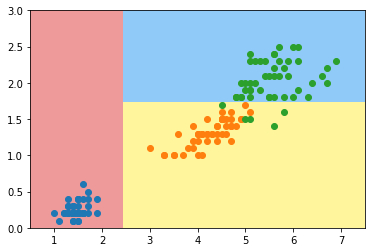

In [10]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 模拟信息熵进行划分

In [11]:
def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] >= value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [16]:
from collections import Counter
from math import log
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):

    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

In [18]:
best_entropy, best_d, best_v = try_split(X, y)
print('best_entropy = ', best_entropy)
print('best_d', best_d)
print('best_v', best_v)

best_entropy =  0.6931471805599453
best_d 0
best_v 2.45


In [19]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [20]:
entropy(y1_l)

0.0

In [21]:
entropy(y1_r)

0.6931471805599453

In [22]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print('best_entropy = ', best_entropy2)
print('best_d', best_d2)
print('best_v', best_v2)

best_entropy =  0.4132278899361904
best_d 1
best_v 1.75


In [23]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [24]:
entropy(y2_l)

0.30849545083110386

In [25]:
entropy(y2_r)

0.10473243910508653